## Replication and public perception


In [62]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

from pyaltmetric import Altmetric, Citation # Useful Altmetric API
import json
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Processing data from Camerer 2018 & Getting Altmetrics

Camerer, C. F., Dreber, A., Holzmeister, F., Ho, T.-H., Huber, J., Johannesson, M., … Wu, H. (2018). *Evaluating the replicability of social science experiments in Nature and Science between 2010 and 2015.* Nature Human Behaviour, 2(9), 637–644. https://doi.org/10.1038/s41562-018-0399-z


In [127]:
camerer = pd.read_csv("camerer_2018.csv")
display(camerer)

,short_cit,Journal,doi,replicated
0,Ackerman et al. (2010),Science,10.1038/nature13530,n
1,Lee and Schwarz (2010),Science,10.1126/science.1186799,n
2,Kidd and Castano (2013),Science,10.1126/science.1239918,n
3,Gervais and Norenzayan (2012),Science,10.1126/science.1215647,n
4,Shah et al. (2012),Science,10.1126/science.1222426,n
5,Sparrow et al. (2011),Science,10.1126/science.1207745,n
6,Ramirez and Beilock (2011),Science,10.1126/science.1199427,n
7,Rand et al. (2012),Nature,10.1038/nature11467,n
8,Wilson et al. (2014),Science,10.1126/science.1250830,y
9,Morewedge et al. (2010),Science,10.1126/science.1195701,y


In [128]:
a = Altmetric()

tweets = [] # Note: Im using all mentions, now, so the variables have the wrong name.
for index,row in camerer.iterrows():
#     print(str(row["doi"]))
    
    b = a.doi(str(row["doi"]))
#     print(b)
    tweet_num = b.get('cited_by_accounts_count')#('cited_by_accounts_count')#
#     print(tweet_num)
    tweets.append(tweet_num)
print(tweets)


[267, 36, 1251, 795, 174, 829, 84, 635, 1218, 97, 29, 58, 109, 38, 531, 434, 8, 43, 2, 69, 267]


In [129]:
camerer["tweets"] = tweets
display(camerer)

,short_cit,Journal,doi,replicated,tweets
0,Ackerman et al. (2010),Science,10.1038/nature13530,n,267
1,Lee and Schwarz (2010),Science,10.1126/science.1186799,n,36
2,Kidd and Castano (2013),Science,10.1126/science.1239918,n,1251
3,Gervais and Norenzayan (2012),Science,10.1126/science.1215647,n,795
4,Shah et al. (2012),Science,10.1126/science.1222426,n,174
5,Sparrow et al. (2011),Science,10.1126/science.1207745,n,829
6,Ramirez and Beilock (2011),Science,10.1126/science.1199427,n,84
7,Rand et al. (2012),Nature,10.1038/nature11467,n,635
8,Wilson et al. (2014),Science,10.1126/science.1250830,y,1218
9,Morewedge et al. (2010),Science,10.1126/science.1195701,y,97


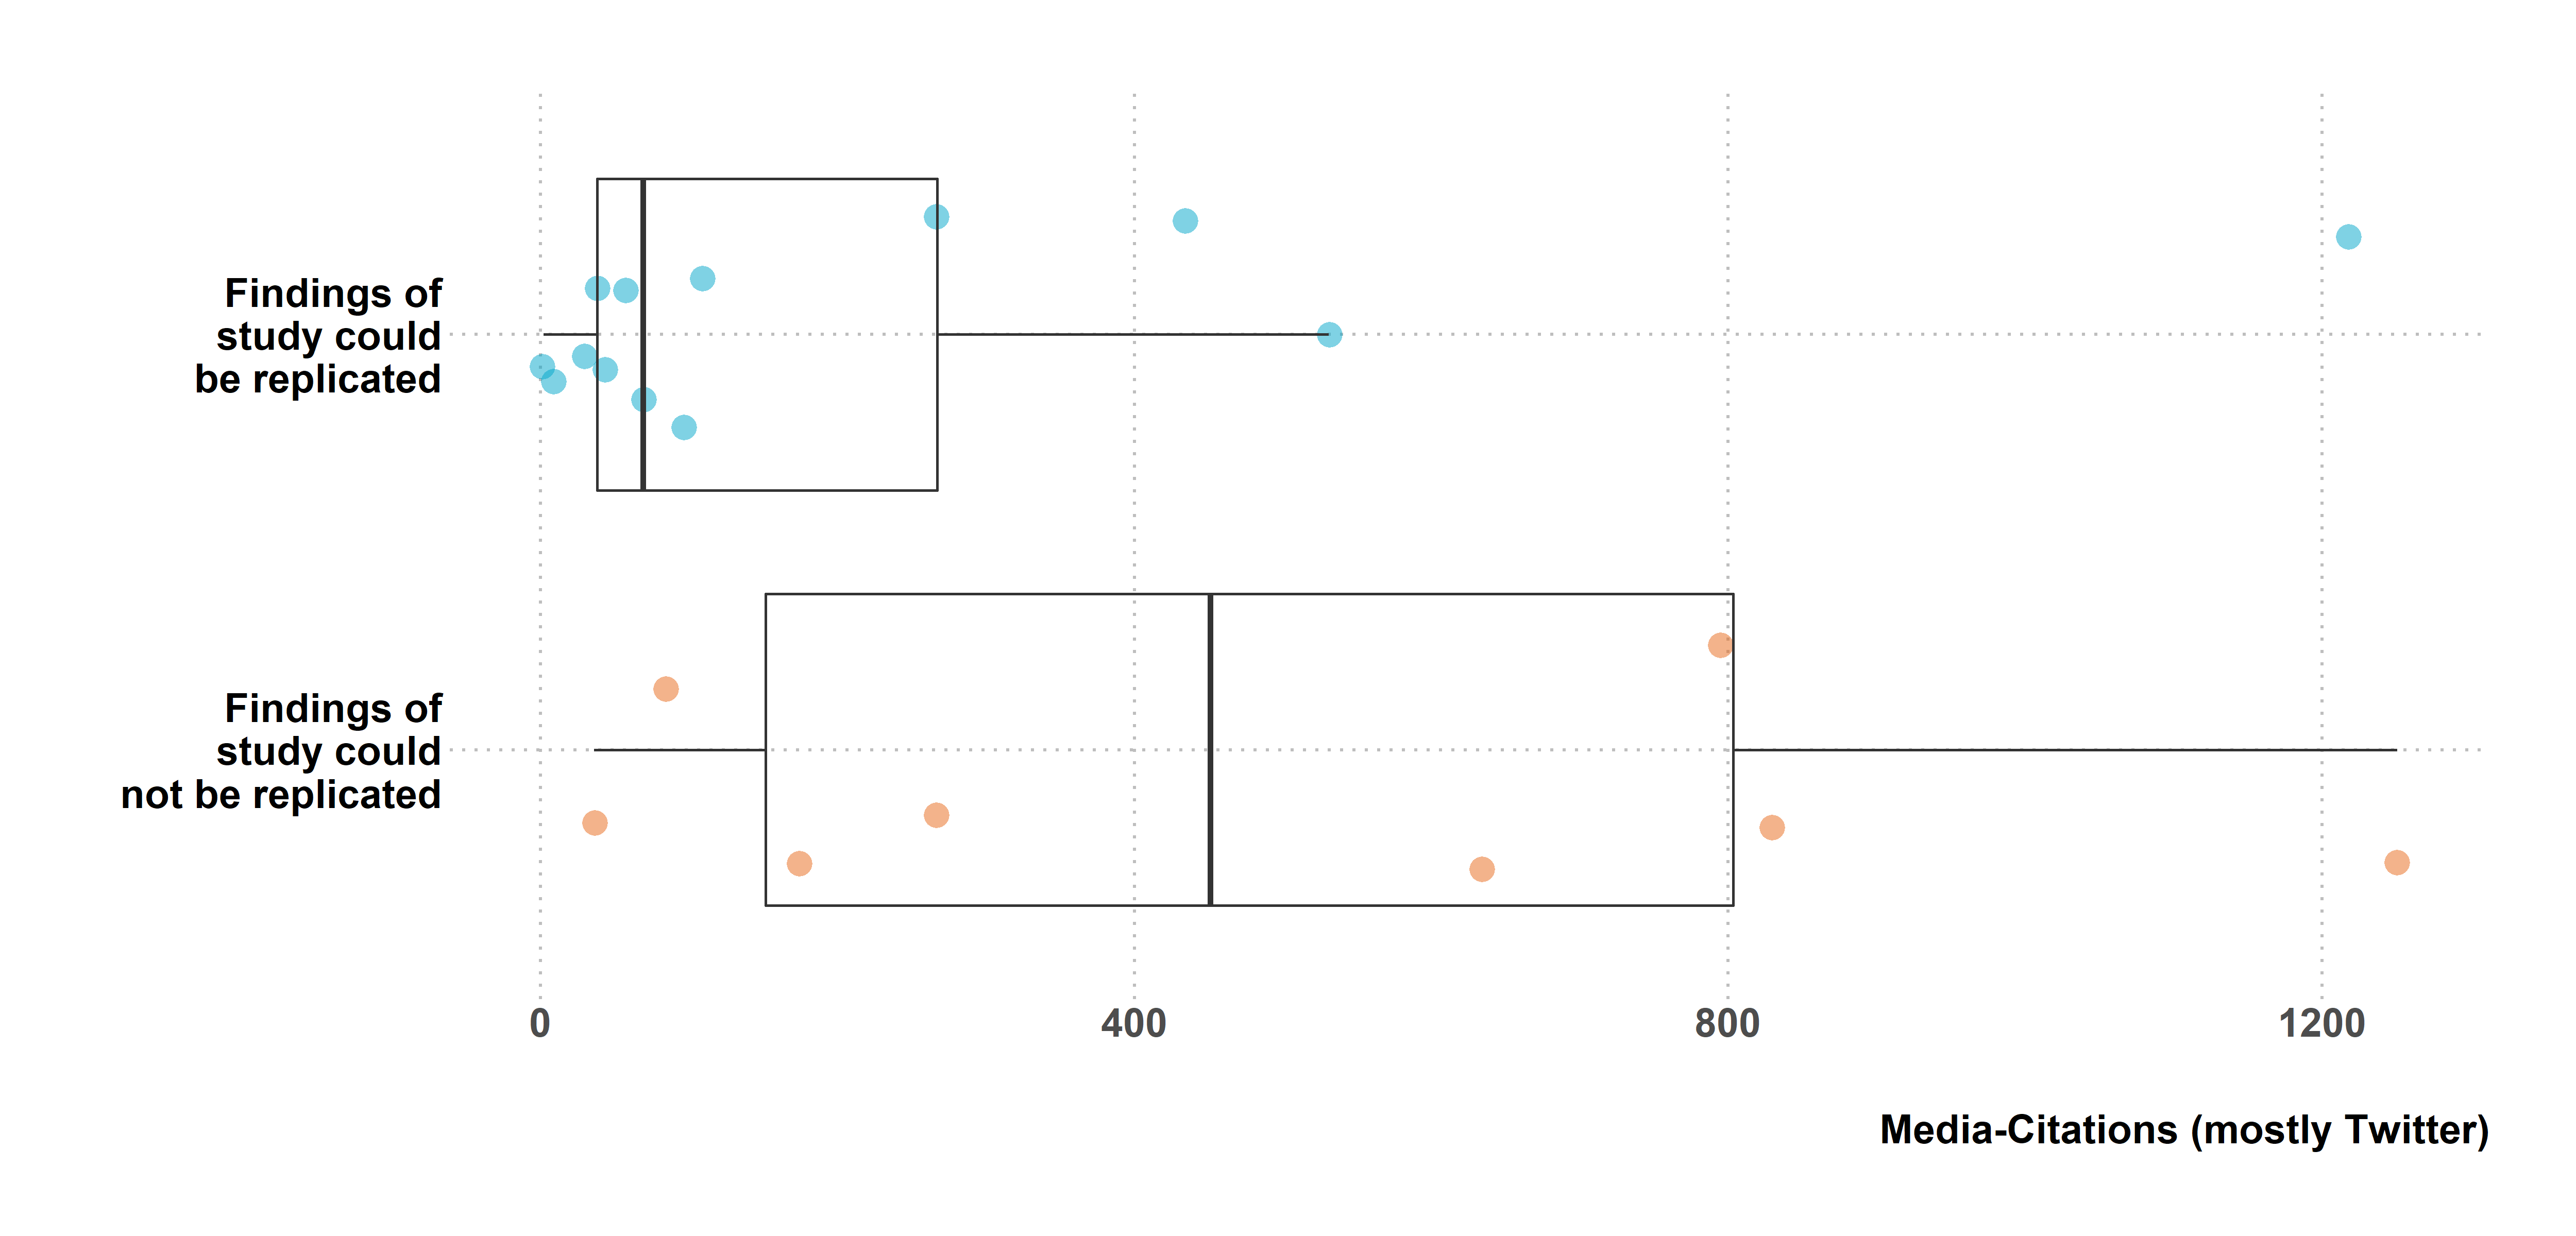

In [146]:
%%R -i camerer --width 5000 --height 2400 -r 400

library(hrbrthemes)
library(ggplot2)
library(ggrepel)

camerer$label <- ""
ix_label <- which(camerer$tweets >= 400)
camerer$label[ix_label] <- camerer$short_cit[ix_label]

q<-ggplot(data = camerer, 
          aes(x=replicated, y=tweets, label=label)) +
theme_ipsum_rc()+
theme(axis.text=element_text(size=14,face="bold"))+

geom_point(aes(color=replicated),shape=16,size=4,alpha=0.5,position=position_jitter(width=0.3))+
scale_color_manual(values=c("#e76818", "#00a6ca"))+

geom_boxplot(alpha=0)+
guides(color=FALSE)+
#geom_text_repel(aes(x=xjit),box.padding=0.4)+

labs(x="", y="", caption="Media-Citations (mostly Twitter)")+
theme(panel.grid.major = element_line(colour = "grey", linetype="dotted", size=0.55),panel.grid.minor = element_blank())+
scale_x_discrete(labels= c("Findings of\nstudy could\nnot be replicated","Findings of\nstudy could\n be replicated"))+
coord_flip()+
theme(axis.text.y = element_text(colour="black"))+

theme(plot.caption=element_text(size=14, face="bold", margin=margin(t=15)))

q


#ggsave("Camerer(2018).png")

### Processing data from Open Science Foundation 2015 & Getting Altmetrics


Collaboration, O. S. (2015). *Estimating the reproducibility of psychological science.* Science, 349(6251), aac4716. https://doi.org/10.1126/science.aac4716


**Note:** I am assuming a study to be replicated iff the authors that conducted the replication state it was. Studies without this rating, were excluded, studies for which no Altmetrics score was retrieved were treated as zero mentions,resulting in (n=66???

The dataset is public, you can get it [here](https://osf.io/fgjvw/).


In [52]:
rpp =  pd.read_csv('rpp_data.csv') #https://osf.io/fgjvw/
filtered_rpp = rpp[rpp['Replicate (R)'].notnull()]

In [53]:
# Get dois via crossref. 
import requests
list_doi = []
list_year = []
base = 'https://api.crossref.org/works?query.bibliographic='
for index,row in filtered_rpp.iterrows():
    print(row["Study Title (O)"])
    url = str(base + str(row["Study Title (O)"])+ str(row["Authors (O)"])+ str(row["Journal (O)"]))
    response = requests.get(url).json()
    list_doi.append(response.get('message').get('items')[0]['DOI'])
    print(response.get('message').get('items')[0]['title'])


Tracing attention and the activation flow in spoken word planning using eye movements.
['Tracing attention and the activation flow in spoken word planning using eye movements.']
Now you see it, now you don't: repetition blindness for nonwords
['Now You See It, Now You Don’t']
Working memory costs of task switching.
['Working memory costs of task switching.']
Accelerated relearning after retrieval-induced forgetting: The benefit of being forgotten.
['Accelerated relearning after retrieval-induced forgetting: The benefit of being forgotten.']
The intermixed-blocked effect in human perceptual learning is not the consequence of trial spacing.
['The intermixed-blocked effect in human perceptual learning is not the consequence of trial spacing.']
A single-system account of the relationship between priming, recognition, and fluency.
['A single-system account of the relationship between priming, recognition, and fluency.']
Modeling distributions of immediate memory effects: No strategies neede

['On the relative independence of thinking biases and cognitive ability.']
Opening the mind to close it: Considering a message in light of important values increases message processing and later resistance to change.
['Opening the mind to close it: Considering a message in light of important values increases message processing and later resistance to change.']
Distinguishing between silent and vocal minorities: Not all deviants feel marginal.
['Distinguishing between silent and vocal minorities: Not all deviants feel marginal.']
Dynamics of self-regulation: How (un) accomplished goal actions affect motivation.
['Dynamics of self-regulation: How (un)accomplished goal actions affect motivation.']
The effects of an implemental mind-set on attitude strength.
['The effects of an implemental mind-set on attitude strength.']
A needs-based model of reconciliation: Satisfying the differential emotional needs of victim and perpetrator as a key to promoting reconciliation.
['A needs-based model o

['What Do Cross-National Comparisons of Personality Traits Tell Us?']
Personality dominance and preferential use of the vertical dimension of space
['Personality Dominance and Preferential Use of the Vertical Dimension of Space']
Conflict-triggered goal shielding: Response conflicts attenuate background monitoring for prospective memory cues.
['Conflict-Triggered Goal Shielding']
Detecting the snake in the grass: attention to fear-relevant stimuli by adults and young children.
['Detecting the Snake in the Grass']
The value heuristic in judgments of relative frequency.
['The Value Heuristic in Judgments of Relative Frequency']
Head up, foot down: Object words orient attention to the objects' typical location.
['Head Up, Foot Down']
[2008, 2017, 2008, 2008, 2008, 2008, 2008, 2008, 2010, 2008, 2008, 2008, 2008, 2008, 2008, 2013, 2008, 2008, 2008, 2008, 2008, 2013, 2010, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 

In [72]:
filtered_rpp["doi"] = list_doi
filtered_rpp["year"] = 2008

display(filtered_rpp)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Study Num,Study Title (O),Authors (O),Journal (O),Volume (O),Issue (O),Pages (O),Project URL,Descriptors (O),Number of Authors (O),Number of Authors (R),1st author (O),"Citation Count, 1st author (O)",Institution 1st author (O),Senior author (O),"Citation count, senior author (O)",Institution senior author (O),1st author (R),"Citation count, 1st author (R)",Institution 1st author (R),Senior author (R),"Citation count, senior author (R)",Institution senior author (R),"Citation count, paper (O)","Institution prestige, 1st author (O)","Institution prestige, senior author (O)","Institution prestige, 1st author (R)","Institution prestige, senior author (R)",Number of Studies (O),Discipline (O),Number of research sites (O),Secondary data (O),Methodology expertise required (O),Opportunity for expectancy bias (O),Opportunity for lack of diligence (O),Surprising result (O),Exciting result (O),Internal conceptual replications (O),Successful conceptual replications (O),Internal direct replications (O),Successful direct replications (O),Feasibility (O),Status (R),Completion (R),Secondary (R),Contact Researcher (R),Study claim date (R),Analysis completion date (R),Coder's email (R),Replicated study number (R),Test statistic (O),N (O),Reported P-value (O),Calculated P-value (O),# Tails (O),Type of analysis (O),Type of effect (O),Description of effect (O),Effect size (O),Actual Power (O),80% power,90% power,95% power,Collect materials from authors,Planned Sample,Planned Power,Original Author's Assessment,OSC reviewer (O),Test statistic (R),N (R),P-value (R),Direction (R),# Tails (R),Type of analysis (R),Type of effect (R),Replicate (R),Power (R),Effect Size (R),OSC reviewer (R),Notes (R),Project audit complete (R),R check location (R),Degree (R),Year of highest degree (R),Current position (R),Domain expertise (R),Method expertise (R),Total publications (R),Peer-reviewed articles (R),Citations (R),Implementation quality (R),Data collection quality (R),Replication similarity (R),Differences (R),Effect similarity (R),Findings similarity (R),Difficulty of implimentation (R),Surprise of outcome (R),Dummy,Number of Research sites (R),Secondary data (R),Area of expertise (R),T_N..O.,T_Test.Statistic..O.,T_TestComparison..O.,T_df1..O.,T_df2..O.,T_Test.value..O.,T_p.comparison..O.,T_pval..O.,T_pval.recalc..O.,T_pval_USE..O.,T_sign..O.,T_r..O.,T_N..R.,T_Test.Statistic..R.,T_Test.Comparison..R.,T_df1..R.,T_df2..R.,T_Test.value..R.,T_p.comparison..R.,T_pval..R.,T_pval.recalc..R.,T_pval_USE..R.,T_sign..R.,T_r..R.,T_Comparison.effects..R.O.,Type of analysis (O).1,Type of analysis (R).1,Unnamed: 129,T_sign_O,T_sign_R,T_O_larger,T_N_O_for_tables,T_N_R_for_tables,Meta-analytic estimate (Fz),O within CI R,Meta-analysis significant,doi,year,mentions
0,1.0,Tracing attention and the activation flow in s...,A Roelofs,JEPLMC,34.0,2.0,353-68,https://osf.io/qwkum/,"Association Learning, Attention, Color Percept...",1.0,1.0,Roelofs,8005.0,Radboud University Nijmegen,Roelofs,8005.0,Radboud University Nijmegen,van Rijn,5100.0,University of Groningen,van Rijn,5100.0,University of Groningen,46.0,2.52,2.52,2.53,2.53,3.0,Cognitive,1.0,Collected themselves,Moderate expertise required,No opportunity for researcher expectations to ...,Strong opportunity for lack of diligence to af...,3.75,2.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,H van Rijn,7/25/14,1-7-2015,M Kidwell,3,"F(1, 13) = 7.11",24,0.02,NaN,NaN,RM ANOVA,interaction,"interaction between task (picture naming, word...",__p^2 = 0.354,NaN,18,23,27,Complete,27.0,0.95,1,M Barnett Cowan,"F(1,28) = 0.63",29.0,0.435,same,NaN,RM ANOVA,interaction,no,0.99,__p^2 = .02,E Cremata,NaN,1.0,https://osf.io/64pz8/,PhD or equivalent,2003.0,Associate Professor (or equivalent),Moderate Expertise,High Expertise,120.0,48.0,5080.0,was about the same quality as the original study,was slightly better than the average study,Virtually identical,The main difference between the original and t...,Somewhat similar,Moderately similar,Slightly challenging,Re

In [73]:
# get Altmetrics for every doi
a = Altmetric()

mentions = []
for index,row in filtered_rpp.iterrows():
    #print(str(row["doi"]))
    
    b = a.doi(str(row["doi"]))
    if b == None:
        mentions.append(np.nan)
    else:
        mention = b.get('cited_by_accounts_count')#
        mentions.append(mention)
print(mentions)


[nan, nan, 2, nan, nan, nan, nan, 1, nan, 2, 1, nan, nan, nan, 1, nan, nan, nan, 2, nan, 1, nan, nan, nan, nan, nan, nan, nan, 10, 3, 2, 1, 4, 4, 1, nan, nan, 1, 2, 1, 6, 1, 2, 2, 5, 4, 2, 1, 1, 30, 1, 1, 4, 1, 1, 3, nan, 4, 6, 6, nan, 2, nan, 7, 3, 3, nan, 1, 1, 6, 1, 10, 2, 4, 4, 2, 5, 1, 1, nan, 4, nan, 60, 1, 5, 4, 30, 17, nan, 14, 14, nan, 15, 1, 1, nan, nan, 8, 1, nan]


In [74]:
filtered_rpp["mentions"] = mentions
filtered_rpp['mentions']= filtered_rpp['mentions'].fillna(0)

final_rpp = filtered_rpp
display(final_rpp)
final_rpp.to_csv('final_rpp.csv')


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Study Num,Study Title (O),Authors (O),Journal (O),Volume (O),Issue (O),Pages (O),Project URL,Descriptors (O),Number of Authors (O),Number of Authors (R),1st author (O),"Citation Count, 1st author (O)",Institution 1st author (O),Senior author (O),"Citation count, senior author (O)",Institution senior author (O),1st author (R),"Citation count, 1st author (R)",Institution 1st author (R),Senior author (R),"Citation count, senior author (R)",Institution senior author (R),"Citation count, paper (O)","Institution prestige, 1st author (O)","Institution prestige, senior author (O)","Institution prestige, 1st author (R)","Institution prestige, senior author (R)",Number of Studies (O),Discipline (O),Number of research sites (O),Secondary data (O),Methodology expertise required (O),Opportunity for expectancy bias (O),Opportunity for lack of diligence (O),Surprising result (O),Exciting result (O),Internal conceptual replications (O),Successful conceptual replications (O),Internal direct replications (O),Successful direct replications (O),Feasibility (O),Status (R),Completion (R),Secondary (R),Contact Researcher (R),Study claim date (R),Analysis completion date (R),Coder's email (R),Replicated study number (R),Test statistic (O),N (O),Reported P-value (O),Calculated P-value (O),# Tails (O),Type of analysis (O),Type of effect (O),Description of effect (O),Effect size (O),Actual Power (O),80% power,90% power,95% power,Collect materials from authors,Planned Sample,Planned Power,Original Author's Assessment,OSC reviewer (O),Test statistic (R),N (R),P-value (R),Direction (R),# Tails (R),Type of analysis (R),Type of effect (R),Replicate (R),Power (R),Effect Size (R),OSC reviewer (R),Notes (R),Project audit complete (R),R check location (R),Degree (R),Year of highest degree (R),Current position (R),Domain expertise (R),Method expertise (R),Total publications (R),Peer-reviewed articles (R),Citations (R),Implementation quality (R),Data collection quality (R),Replication similarity (R),Differences (R),Effect similarity (R),Findings similarity (R),Difficulty of implimentation (R),Surprise of outcome (R),Dummy,Number of Research sites (R),Secondary data (R),Area of expertise (R),T_N..O.,T_Test.Statistic..O.,T_TestComparison..O.,T_df1..O.,T_df2..O.,T_Test.value..O.,T_p.comparison..O.,T_pval..O.,T_pval.recalc..O.,T_pval_USE..O.,T_sign..O.,T_r..O.,T_N..R.,T_Test.Statistic..R.,T_Test.Comparison..R.,T_df1..R.,T_df2..R.,T_Test.value..R.,T_p.comparison..R.,T_pval..R.,T_pval.recalc..R.,T_pval_USE..R.,T_sign..R.,T_r..R.,T_Comparison.effects..R.O.,Type of analysis (O).1,Type of analysis (R).1,Unnamed: 129,T_sign_O,T_sign_R,T_O_larger,T_N_O_for_tables,T_N_R_for_tables,Meta-analytic estimate (Fz),O within CI R,Meta-analysis significant,doi,year,mentions
0,1.0,Tracing attention and the activation flow in s...,A Roelofs,JEPLMC,34.0,2.0,353-68,https://osf.io/qwkum/,"Association Learning, Attention, Color Percept...",1.0,1.0,Roelofs,8005.0,Radboud University Nijmegen,Roelofs,8005.0,Radboud University Nijmegen,van Rijn,5100.0,University of Groningen,van Rijn,5100.0,University of Groningen,46.0,2.52,2.52,2.53,2.53,3.0,Cognitive,1.0,Collected themselves,Moderate expertise required,No opportunity for researcher expectations to ...,Strong opportunity for lack of diligence to af...,3.75,2.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,H van Rijn,7/25/14,1-7-2015,M Kidwell,3,"F(1, 13) = 7.11",24,0.02,NaN,NaN,RM ANOVA,interaction,"interaction between task (picture naming, word...",__p^2 = 0.354,NaN,18,23,27,Complete,27.0,0.95,1,M Barnett Cowan,"F(1,28) = 0.63",29.0,0.435,same,NaN,RM ANOVA,interaction,no,0.99,__p^2 = .02,E Cremata,NaN,1.0,https://osf.io/64pz8/,PhD or equivalent,2003.0,Associate Professor (or equivalent),Moderate Expertise,High Expertise,120.0,48.0,5080.0,was about the same quality as the original study,was slightly better than the average study,Virtually identical,The main difference between the original and t...,Somewhat similar,Moderately similar,Slightly challenging,Re

In [66]:
final_rpp = pd.read_csv('final_rpp.csv')
display(final_rpp)

,Unnamed: 0,Study Num,Study Title (O),Authors (O),Journal (O),Volume (O),Issue (O),Pages (O),Project URL,Descriptors (O),Number of Authors (O),Number of Authors (R),1st author (O),"Citation Count, 1st author (O)",Institution 1st author (O),Senior author (O),"Citation count, senior author (O)",Institution senior author (O),1st author (R),"Citation count, 1st author (R)",Institution 1st author (R),Senior author (R),"Citation count, senior author (R)",Institution senior author (R),"Citation count, paper (O)","Institution prestige, 1st author (O)","Institution prestige, senior author (O)","Institution prestige, 1st author (R)","Institution prestige, senior author (R)",Number of Studies (O),Discipline (O),Number of research sites (O),Secondary data (O),Methodology expertise required (O),Opportunity for expectancy bias (O),Opportunity for lack of diligence (O),Surprising result (O),Exciting result (O),Internal conceptual replications (O),Successful conceptual replications (O),Internal direct replications (O),Successful direct replications (O),Feasibility (O),Status (R),Completion (R),Secondary (R),Contact Researcher (R),Study claim date (R),Analysis completion date (R),Coder's email (R),Replicated study number (R),Test statistic (O),N (O),Reported P-value (O),Calculated P-value (O),# Tails (O),Type of analysis (O),Type of effect (O),Description of effect (O),Effect size (O),Actual Power (O),80% power,90% power,95% power,Collect materials from authors,Planned Sample,Planned Power,Original Author's Assessment,OSC reviewer (O),Test statistic (R),N (R),P-value (R),Direction (R),# Tails (R),Type of analysis (R),Type of effect (R),Replicate (R),Power (R),Effect Size (R),OSC reviewer (R),Notes (R),Project audit complete (R),R check location (R),Degree (R),Year of highest degree (R),Current position (R),Domain expertise (R),Method expertise (R),Total publications (R),Peer-reviewed articles (R),Citations (R),Implementation quality (R),Data collection quality (R),Replication similarity (R),Differences (R),Effect similarity (R),Findings similarity (R),Difficulty of implimentation (R),Surprise of outcome (R),Dummy,Number of Research sites (R),Secondary data (R),Area of expertise (R),T_N..O.,T_Test.Statistic..O.,T_TestComparison..O.,T_df1..O.,T_df2..O.,T_Test.value..O.,T_p.comparison..O.,T_pval..O.,T_pval.recalc..O.,T_pval_USE..O.,T_sign..O.,T_r..O.,T_N..R.,T_Test.Statistic..R.,T_Test.Comparison..R.,T_df1..R.,T_df2..R.,T_Test.value..R.,T_p.comparison..R.,T_pval..R.,T_pval.recalc..R.,T_pval_USE..R.,T_sign..R.,T_r..R.,T_Comparison.effects..R.O.,Type of analysis (O).1,Type of analysis (R).1,Unnamed: 129,T_sign_O,T_sign_R,T_O_larger,T_N_O_for_tables,T_N_R_for_tables,Meta-analytic estimate (Fz),O within CI R,Meta-analysis significant,doi,year,mentions
0,0,1.0,Tracing attention and the activation flow in s...,A Roelofs,JEPLMC,34.0,2.0,353-68,https://osf.io/qwkum/,"Association Learning, Attention, Color Percept...",1.0,1.0,Roelofs,8005.0,Radboud University Nijmegen,Roelofs,8005.0,Radboud University Nijmegen,van Rijn,5100.0,University of Groningen,van Rijn,5100.0,University of Groningen,46.0,2.52,2.52,2.53,2.53,3.0,Cognitive,1.0,Collected themselves,Moderate expertise required,No opportunity for researcher expectations to ...,Strong opportunity for lack of diligence to af...,3.75,2.50,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,H van Rijn,7/25/14,1-7-2015,M Kidwell,3,"F(1, 13) = 7.11",24,0.02,NaN,NaN,RM ANOVA,interaction,"interaction between task (picture naming, word...",__p^2 = 0.354,NaN,18,23,27,Complete,27.0,0.95,1,M Barnett Cowan,"F(1,28) = 0.63",29.0,0.435,same,NaN,RM ANOVA,interaction,no,0.99,__p^2 = .02,E Cremata,NaN,1.0,https://osf.io/64pz8/,PhD or equivalent,2003.0,Associate Professor (or equivalent),Moderate Expertise,High Expertise,120.0,48.0,5080.0,was about the same quality as the original study,was slightly better than the average study,Virtually identical,The main difference between the original and t...,Somewhat similar,Moderately similar,Slightly 

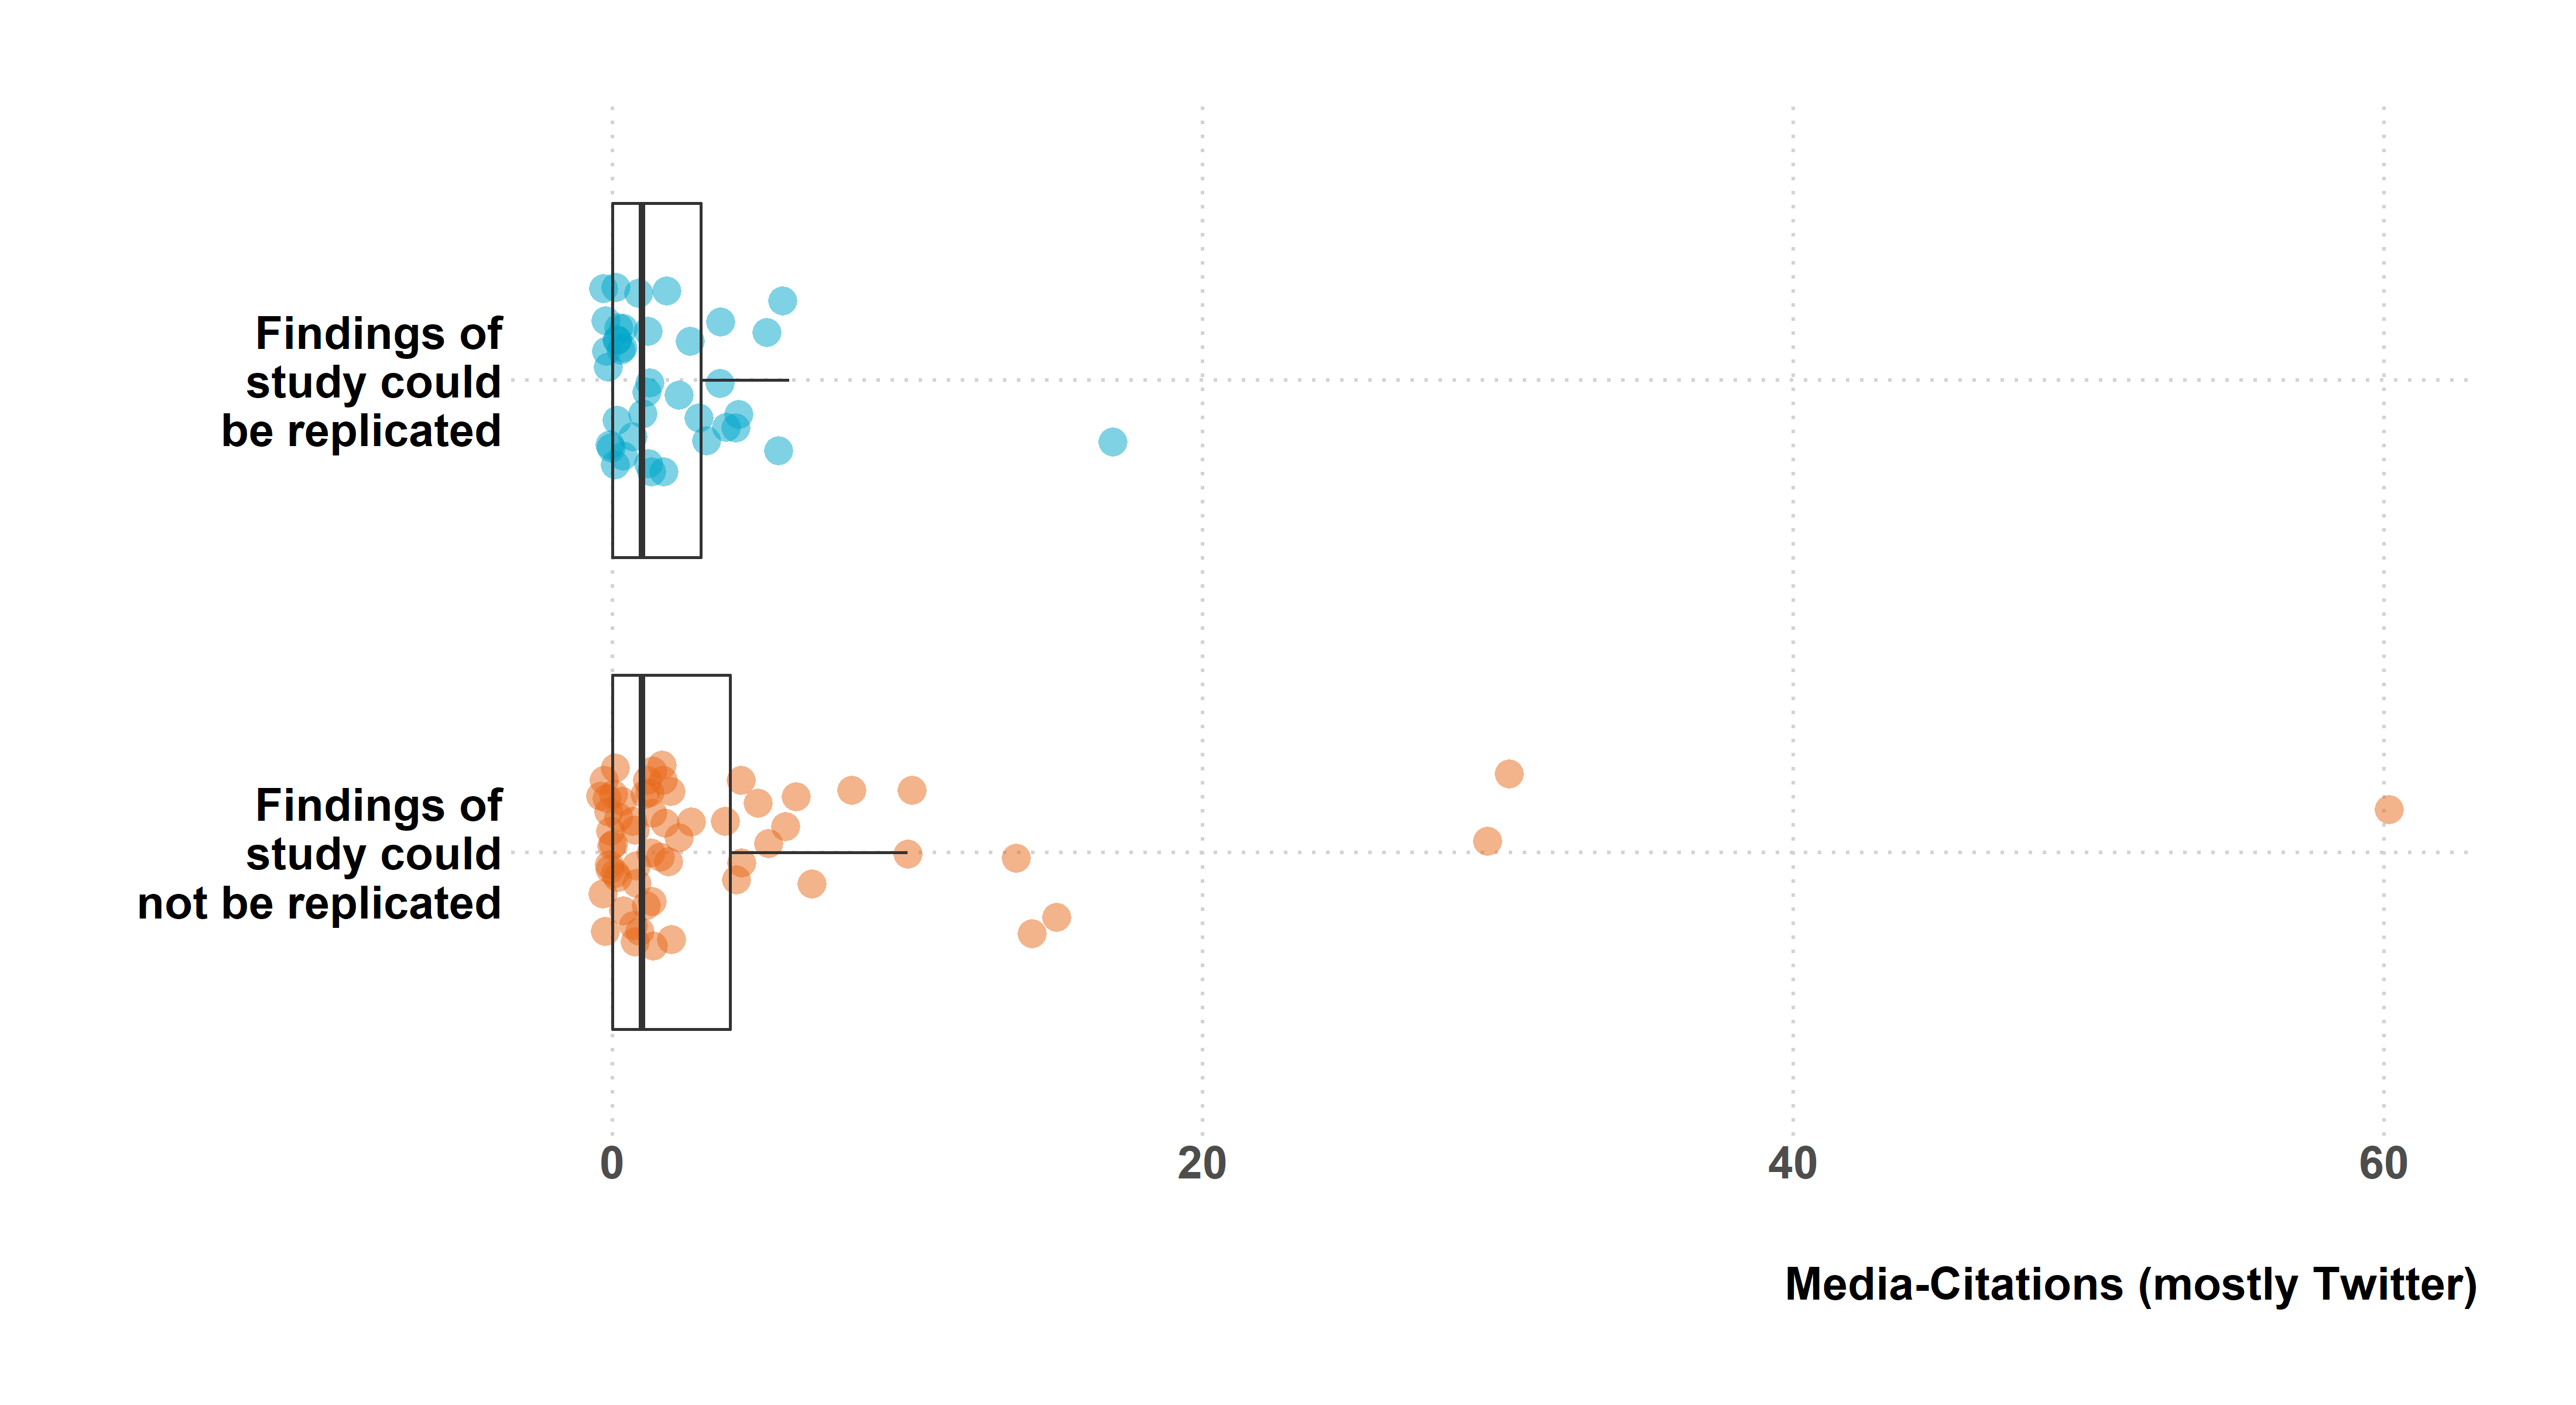

In [145]:
%%R -i final_rpp -o final_rpp --width 4400 --height 2400 -r 400

library(hrbrthemes)
library(ggplot2)
#devtools::install_github("slowkow/ggrepel")
#remove.packages("ggrepel")
library(ggrepel)


final_rpp$Replicate..R. <- tolower( final_rpp$Replicate..R.)

final_rpp$label <- ""
ix_label <- which(final_rpp$mentions >= 17)
final_rpp$label[ix_label] <- paste(final_rpp$X1st.author..O.[ix_label], " et al. (",final_rpp$year[ix_label],")",sep="")



q <- ggplot(data=final_rpp, aes(x=Replicate..R., y=mentions, label=label)) +

theme_ipsum_rc()+theme(axis.text=element_text(size=14,face="bold"))+

geom_point(aes(color=Replicate..R.),shape=16, size=4, alpha=0.5, position=position_jitter(width=0.2))+#position = pos,
scale_color_manual(values=c("#e76818", "#00a6ca"))+

geom_boxplot(alpha=0)+
guides(color=FALSE)+
#geom_text_repel(aes(x=xjit),box.padding=0.4)+


labs(x="", y="", caption="Media-Citations (mostly Twitter)")+
theme(panel.grid.major = element_line(colour = "lightgrey", linetype="dotted", size=0.55),panel.grid.minor = element_blank())+
scale_x_discrete(labels= c("Findings of\nstudy could\nnot be replicated","Findings of\nstudy could\n be replicated"))+
coord_flip()+
theme(axis.text.y = element_text(colour="black"))+

theme(plot.caption=element_text(size=14, face="bold", margin=margin(t=15)))


q
#ggsave("OSF(2015).png")